[{'boxes': tensor([[ 397.7532,  179.6814,  887.1500,  761.7543],
        [1074.0927,  696.1312, 1133.6246,  784.4289],
        [ 549.5682,  361.8872,  577.3638,  428.8936],
        [ 254.4035,  227.1596, 1046.7731,  613.1616],
        [1101.7198,  693.1691, 1200.0000,  797.3309],
        [ 822.0928,  627.7024,  874.5294,  736.2799],
        [ 373.5995,  262.6668,  545.4396,  698.6090],
        [ 791.2805,  625.3076,  838.6964,  737.6976],
        [ 667.7391,  125.9008,  998.1389,  779.0884],
        [ 788.4646,  640.0878,  815.3510,  708.4918],
        [ 549.8568,  349.8700,  569.8127,  388.2969],
        [ 793.2955,  677.9878,  822.4964,  723.4581],
        [  28.9106,  100.3203,  851.0485,  768.1993],
        [ 557.6139,  340.5601,  573.3385,  367.9398],
        [1105.1505,  702.4879, 1148.8268,  798.4058],
        [ 238.1405,  322.9436,  540.3600,  675.5076],
        [ 775.0679,  639.7051,  886.0058,  726.5195],
        [ 510.8462,  208.1458,  737.7157,  703.5414],
        [ 798.322

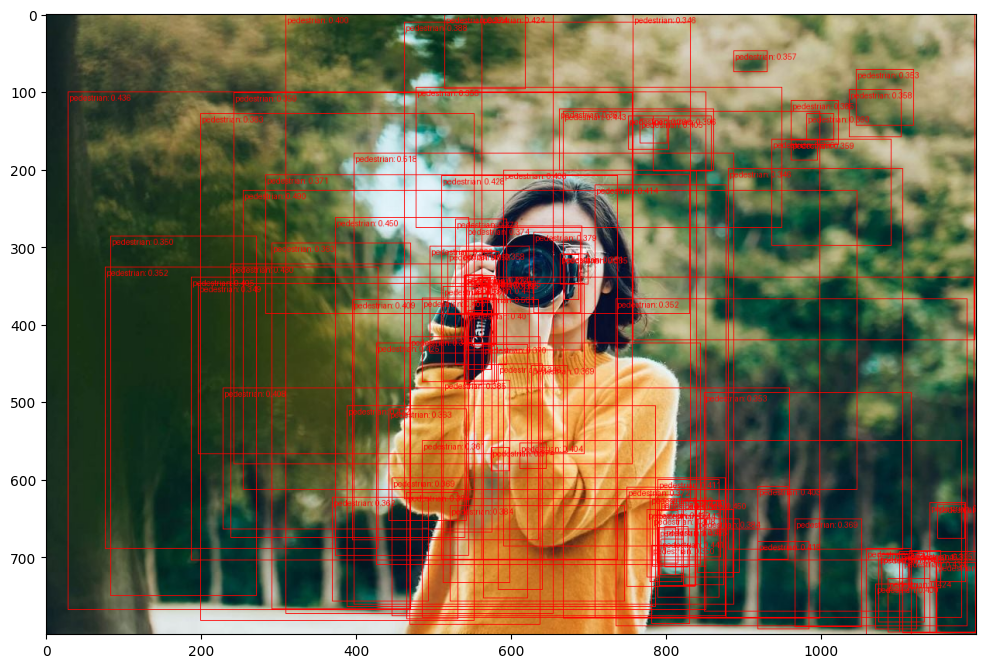

In [11]:
import torch
import matplotlib.pyplot as plt
import FurnitureDetector
from torchvision.utils import draw_bounding_boxes, draw_segmentation_masks

# Define your model architecture
model = FurnitureDetector.get_model(train=True)

# Set model to evaluation mode
model.eval()

# Perform inference
with torch.no_grad():
    url = "../dataset/free-images.jpg"
    #url = "../dataset/data_train/0ab169c3-9e02-4133-9bca-c0bca0c96533.jpg"
    image, image_tensor = FurnitureDetector.get_image(url)
    predictions = model(image_tensor)

    print(predictions)

    pred = predictions[0]

    image = (255.0 * (image - image.min()) / (image.max() - image.min())).to(torch.uint8)
    image = image[:3, ...]
    pred_labels = [f"pedestrian: {score:.3f}" for label, score in zip(pred["labels"], pred["scores"])]
    pred_boxes = pred["boxes"].long()
    output_image = draw_bounding_boxes(image, pred_boxes, pred_labels, colors="red")

    plt.figure(figsize=(12, 12))
    plt.imshow(output_image.permute(1, 2, 0))



In [20]:
import torch
import torchvision.transforms as transforms
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.datasets import CocoDetection
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from PIL import Image, ImageDraw

# COCO class labels
coco_labels = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat',
    'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse',
    'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
    'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove',
    'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon',
    'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut',
    'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse',
    'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

# Step 1: Load pre-trained Faster R-CNN model
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Step 2: Load the image
image_path = "../dataset/free-images.jpg"
image = Image.open(image_path).convert("RGB")

# Step 3: Preprocess the image
transform = transforms.Compose([transforms.ToTensor()])
image_tensor = transform(image)

# Step 4: Perform inference
with torch.no_grad():
    predictions = model([image_tensor])

# Step 5: Display the image with bounding boxes and labels
draw = ImageDraw.Draw(image)
for box, label_id, score in zip(predictions[0]['boxes'], predictions[0]['labels'], predictions[0]['scores']):
    label = coco_labels[int(label_id)]
    draw.rectangle([(box[0], box[1]), (box[2], box[3])], outline="red")
    draw.text((box[0], box[1]), f"{label} ({score:.2f})", fill="red")

image.show()
